## Step 1: Understanding the Data

- Load Data and Fix Target Variable
- Sample Rows: 1217 entries, Data columns (total 14 columns - including target)
- all numerical fields

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./CellDNA.csv", header=None)
'''The last column with non-zero values indicate the bacterium are interesting enough for further study. 
Otherwise (i.e. last column with zero values), those bacterium are not interesting candidates for further study.'''
df[13] = (df[13] > 0).astype(int)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 14 columns):
0     1217 non-null int64
1     1217 non-null float64
2     1217 non-null float64
3     1217 non-null float64
4     1217 non-null float64
5     1217 non-null float64
6     1217 non-null float64
7     1217 non-null int64
8     1217 non-null int64
9     1217 non-null float64
10    1217 non-null float64
11    1217 non-null float64
12    1217 non-null float64
13    1217 non-null int32
dtypes: float64(10), int32(1), int64(3)
memory usage: 128.4 KB


## Step 2: Data Exploration
- There is no null values
- Unbalanced Data (Class Variable), Bacterium which is interesting enough shows is more important to us (Class 1)
- Some columns are skewed - Normalizing should fix a problem
- Based on correlation heatmap and pairplot, Most independent variable are useful towards separating target classes

In [3]:
def ret_percentage(column):
    return round(column.value_counts(normalize=True) * 100,2)

print(ret_percentage(df[13]))

df[13].value_counts() #Unbalanced Dataset

0    83.57
1    16.43
Name: 13, dtype: float64


0    1017
1     200
Name: 13, dtype: int64

- **Interpreting Skewness:** If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

In [4]:
print(df.skew(axis = 0, skipna = True))

0     2.457449
1    -0.059809
2     0.823809
3     1.526790
4     4.153459
5    -2.473485
6     0.008928
7     2.717102
8    -8.242723
9     1.300952
10   -0.683266
11    0.033663
12    2.935010
13    1.813771
dtype: float64


In [5]:
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,200.366475,419.476953,211.335155,33.388599,9.376939,0.908628,0.160337,202.640099,0.516845,15.288929,0.775538,0.474788,78.928198,0.164339
std,135.665649,215.563920,141.592818,19.152143,3.634969,0.110942,50.589440,142.585975,2.071880,4.623930,0.117802,0.158341,48.798548,0.370735
min,70.000000,28.176471,27.870130,10.282437,3.080963,0.218074,-89.531335,70.000000,-26.000000,9.440697,0.261049,0.114482,28.193000,0.000000
25%,107.000000,243.400000,96.200000,18.760441,7.529888,0.885337,-41.131405,108.000000,1.000000,11.672045,0.702186,0.353261,45.974000,0.000000
50%,160.000000,415.360000,183.834286,27.832476,8.463304,0.949998,-0.104479,161.000000,1.000000,14.272993,0.789474,0.474359,66.302000,0.000000
75%,252.000000,611.128440,292.824742,44.462419,9.801152,0.978903,41.010273,253.000000,1.000000,17.912464,0.866071,0.592593,97.928000,0.000000
max,1089.000000,773.919643,575.340206,155.330123,43.487111,0.998459,89.881120,1159.000000,1.000000,37.236513,1.000000,0.905882,493.749000,1.000000


In [6]:
'''plt.figure(figsize = (16,8))
ax = sns.pairplot(df, hue=13)'''

'plt.figure(figsize = (16,8))\nax = sns.pairplot(df, hue=13)'

In [7]:
'''plt.figure(figsize = (16,8))
ax = sns.heatmap(df.corr(), annot=True)'''

'plt.figure(figsize = (16,8))\nax = sns.heatmap(df.corr(), annot=True)'

## Step 3: Prepare Train-Test Dataset
- Create input and target variables
- Normalize Data
- Perform Train-Test Split for Model Evaluation

In [8]:
# creating input features and target variables
X= df.iloc[:,0:13]
y= df.iloc[:,13]

In [9]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072


In [10]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2019)

## Step 4: Create Baseline Model 
- Define Model
- Fit on training Set
- Evaluate Model on Test Set
- Focal Loss Check to handle Data Imbalanace

In [12]:
from keras import backend as K
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [14]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim=13))
#Second  Hidden Layer
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='adam',loss=['binary_crossentropy'], metrics =['accuracy']) #binary_crossentropy
#, metrics =['accuracy']

In [15]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100, validation_split=0.1) #batch_size=32, epochs=150 - 92%test

Train on 875 samples, validate on 98 samples
Epoch 1/100
875/875 [==============================] - 0s 264us/step - loss: 0.6704 - acc: 0.8377 - val_loss: 0.6343 - val_acc: 0.8061
Epoch 2/100
875/875 [==============================] - 0s 57us/step - loss: 0.5259 - acc: 0.8389 - val_loss: 0.4102 - val_acc: 0.8061
Epoch 3/100
875/875 [==============================] - 0s 55us/step - loss: 0.3509 - acc: 0.8389 - val_loss: 0.3251 - val_acc: 0.8061
Epoch 4/100
875/875 [==============================] - 0s 56us/step - loss: 0.3137 - acc: 0.8389 - val_loss: 0.3089 - val_acc: 0.8061
Epoch 5/100
875/875 [==============================] - 0s 55us/step - loss: 0.3011 - acc: 0.8389 - val_loss: 0.3003 - val_acc: 0.8061
Epoch 6/100
875/875 [==============================] - 0s 55us/step - loss: 0.2875 - acc: 0.8389 - val_loss: 0.2862 - val_acc: 0.8061
Epoch 7/100
875/875 [==============================] - 0s 54us/step - loss: 0.2718 - acc: 0.8389 - val_loss: 0.2675 - val_acc: 0.8061
Epoch 8/100
875/

875/875 [==============================] - 0s 51us/step - loss: 0.1558 - acc: 0.9326 - val_loss: 0.1403 - val_acc: 0.9694
Epoch 62/100
875/875 [==============================] - 0s 50us/step - loss: 0.1558 - acc: 0.9337 - val_loss: 0.1423 - val_acc: 0.9694
Epoch 63/100
875/875 [==============================] - 0s 49us/step - loss: 0.1557 - acc: 0.9337 - val_loss: 0.1402 - val_acc: 0.9694
Epoch 64/100
875/875 [==============================] - 0s 50us/step - loss: 0.1557 - acc: 0.9349 - val_loss: 0.1396 - val_acc: 0.9694
Epoch 65/100
875/875 [==============================] - 0s 50us/step - loss: 0.1562 - acc: 0.9303 - val_loss: 0.1382 - val_acc: 0.9694
Epoch 66/100
875/875 [==============================] - 0s 49us/step - loss: 0.1542 - acc: 0.9383 - val_loss: 0.1420 - val_acc: 0.9694
Epoch 67/100
875/875 [==============================] - 0s 49us/step - loss: 0.1547 - acc: 0.9326 - val_loss: 0.1403 - val_acc: 0.9694
Epoch 68/100
875/875 [==============================] - 0s 49us/step

In [16]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

973/973 [==============================] - 0s 8us/step


[0.14464352562456925, 0.9414182939975382]

In [17]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model

244/244 [==============================] - 0s 25us/step


[0.234797901305996, 0.8975409855608081]

In [18]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)
y_pred_2 = classifier.predict_classes(X_test)

In [19]:
y_test.value_counts()

0    204
1     40
Name: 13, dtype: int64

Test Set Accuracy:
 0.8975409836065574


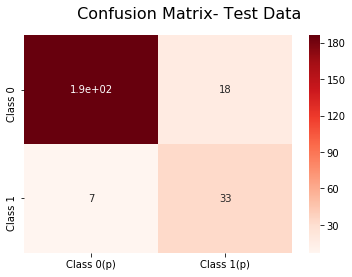

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Evaluating the predictions using a Confusion Matrix
print("Test Set Accuracy:\n", accuracy_score(y_pred, y_test))

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['Class 0', 'Class 1'],
                  columns = ['Class 0(p)', 'Class 1(p)'])
plt.figure(figsize=(6,4))
s_title = ' Confusion Matrix- Test Data'
plt.suptitle(s_title, fontsize=16)

#plt.subplot(2,2,1)
#plt.gca().set_title('Test Data')
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Reds)
plt.show()

## The accuracy, Precision, and Recall for each class prediction

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       204
           1       0.65      0.82      0.73        40

   micro avg       0.90      0.90      0.90       244
   macro avg       0.81      0.87      0.83       244
weighted avg       0.91      0.90      0.90       244



In [24]:
yt_pred=classifier.predict(X_train)
yt_pred =(yt_pred>0.5)
print(classification_report(y_train, yt_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       813
           1       0.80      0.86      0.83       160

   micro avg       0.94      0.94      0.94       973
   macro avg       0.89      0.91      0.90       973
weighted avg       0.94      0.94      0.94       973



## ROC curve plot 

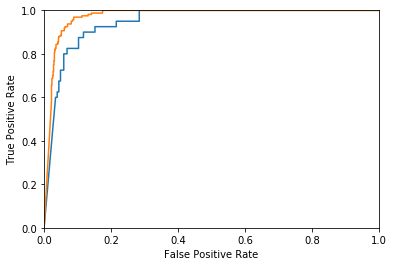

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=classifier.predict_proba(X_test)
yt_pred_prob=classifier.predict_proba(X_train)
fpr , tpr , thresholds = roc_curve ( y_test , y_pred_prob)
fprt , tprt , thresholdst = roc_curve ( y_train , yt_pred_prob)

def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.plot(fprt,tprt) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    

plot_roc_curve (fpr,tpr) 

In [23]:
auc_score=roc_auc_score(y_test , y_pred_prob) 
print("Test Set AUC:\n", auc_score)

Test Set AUC:
 0.9464460784313726


## Final Models

Both the models are performing well on classifying Target Classes. It can be improved by applying advanced regularization techniques.

| Model | AUC Score | Accuracy |
| --- | --- | --- |
|Binary Cross Entropy Loss | 0.9486 | 0.91 |
|Focal Loss|0.9537|0.90|